# Importing the transcript from the 2nd presidential debate on 10/23/2020

Then, som NLP fun stuff

In [169]:
#package import
from bs4 import BeautifulSoup
import requests
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load("en_core_web_sm")
from textblob import TextBlob
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer

from PIL import Image

import pandas as pd
import seaborn as sns

import wordcloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns



In [75]:
#importing the page
page = requests.get("https://www.rev.com/blog/transcripts/donald-trump-joe-biden-final-presidential-debate-transcript-2020")
page

<Response [200]>

In [76]:
#confirming it worked (status code 200 means success)
page.status_code

200

In [77]:
#inspecting content of page- its long so commenting out for now
#page.content

In [78]:
#creating instance of beautiful soup on our content
soup = BeautifulSoup(page.content, 'html.parser')

In [79]:
#this is also super long
#print(soup.prettify())

In [80]:
#list(soup.children)

In [81]:
#looking at beautiful soup item types in the tag components
[type(item) for item in list(soup.children)]

[bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.NavigableString,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.NavigableString,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.NavigableString,
 bs4.element.NavigableString,
 bs4.element.NavigableString,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Comment,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.Tag,
 bs4.element.Tag,
 bs4.element.Tag,
 bs4.element.Tag,
 bs4.element.Tag,
 bs4.element.Tag,
 bs4.element.Tag,
 bs4.element.Tag,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Comment,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.eleme

In [82]:
#grabbing correct element
html = list(soup.children)[2]

In [83]:
#list(html.children)


In [84]:
#drilling into correct body portion
body = list(html.children)[1]
#body

In [85]:
#How long is this portion?
len(list(body.children))

181

In [86]:
#list(body.children)

In [87]:
#selecting portion with the actual transcript
p = list(body.children)[151]

### Splitting out transcript only

In [88]:
# Term to split on
split_term = "articleBody"

phrase = str(p)

# Split the phrase
article_split = re.split(split_term,phrase)

In [89]:
article_body = article_split[1]

pattern_2 = "keywords"

article_body_split = re.split(pattern_2,article_body)

article_text = article_body_split[0]

In [90]:
#article_text

# Now, looking for matches


In [91]:
#example of regex expression at work
re.findall(r'Kristen Welker: (.*?)(Joe Biden:|Donald Trump:)', article_text)[3][0]


"(13:01)  President Trump, I'd like to follow up with you and your comments. You talked about taking a therapeutic, I assume you're referencing Regeneron. You also said a vaccine will be coming within weeks. Is that a guarantee?    "

In [92]:
#splitting off moderator's lines
moderator_transcript = [i[0] for i in re.findall('Kristen Welker: (.*?)(Joe Biden:|Donald Trump:)', article_text)]


In [93]:
moderator_transcript[:5]

["(00:18)  Good evening, everyone. Good evening. Thank you so much for being here. It is such an honor for me to moderate this debate tonight, the final debate. I want to welcome the first family and the first lady. We're so glad and thankful that you are feeling better. I want to welcome the Biden family, Dr. Jill Biden. Thank you all for being here tonight. We are so excited. We're looking forward to a really robust discussion. And the only thing I would reiterate are the CPD guidelines that when the candidates are talking, please hold any applause or any other reactions. Except of course, when they walk out, make sure you cheer and loud and applause so that everyone can hear you. Thank you for having me. This is really the honor of a lifetime. I am going to sit down and just get organized and get settled and the show will start very soon. Thank you for being here. (silence). Good evening from Belmont University in Nashville, Tennessee. I'm Kristen Welker of NBC News. And I welcome y

In [94]:
#how many times did the moderator speak?
len(moderator_transcript)

184

In [95]:
#trump's transcript
Trump_transcript = [i[0] for i in re.findall('Donald Trump: (.*?)(Joe Biden:|Kristen Welker:|Donald Trump:)', article_text)]

In [96]:
#biden's transcript
Biden_transcript = [i[0] for i in re.findall('Joe Biden: (.*?)(Donald Trump:|Kristen Welker:|Joe Biden:)', article_text)]

# Number of times each candidate spoke

In [26]:
len(Trump_transcript)

177

In [27]:
len(Biden_transcript)

115

In [66]:
(177-115)

62

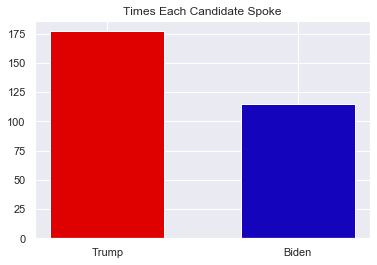

In [34]:
plt.bar(x= ["Trump", "Biden"], height = [len(Trump_transcript), len(Biden_transcript)], width= .6, color = ['#DE0100', '#1405BD'])
plt.title("Times Each Candidate Spoke")
plt.show()

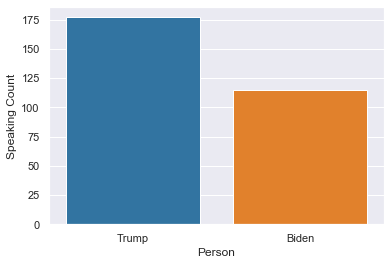

In [36]:
length = pd.DataFrame.from_dict({'Person': ["Trump", "Biden"], 'Speaking Count': [len(Trump_transcript), len(Biden_transcript)]})

#length
sns.set_context("notebook")
sns.set_style("darkgrid")
ax = sns.barplot(x="Person", y="Speaking Count", data=length)


# Word clouds

In [611]:
nlp.vocab["going"].is_stop = True
nlp.vocab["said"].is_stop = True
nlp.vocab["people"].is_stop = True

# Plotting top 10 words for all three parties

In [37]:
def plot_top_words(lsst, name):
    doc = nlp(str([i for i in lsst]))
    tokens = [token.text for token in doc if not token.is_punct 
          and not token.is_stop 
          and not token.text == ' '
          and not token.text == '   ']
    
    counts = Counter(tokens)
    df_counts = pd.DataFrame.from_dict(counts.most_common(15))
    df_counts.columns = ['Word', 'Count']
    df_counts.sort_values('Count',inplace=True)
    df_counts.plot.barh(x='Word', y='Count', title = f'{name} Top Words Minimal Processing')
    plt.show()

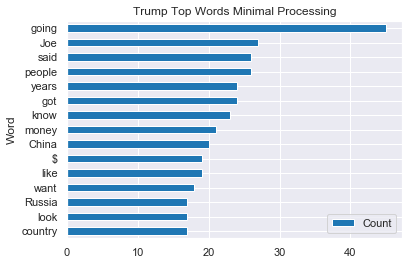

In [38]:
plot_top_words(Trump_transcript, 'Trump')

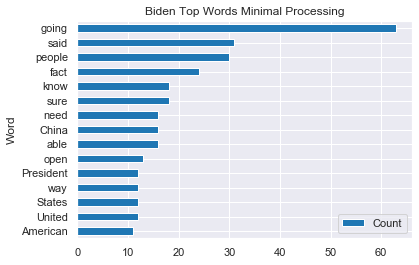

In [39]:
plot_top_words(Biden_transcript, 'Biden')

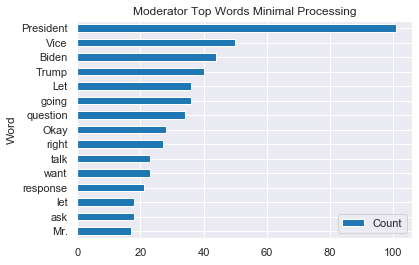

In [41]:
plot_top_words(moderator_transcript, 'Moderator')

# Word count on specific words

In [616]:
#function to make word clouds
def word_cld(trans):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords=stopwords).generate(str(trans))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

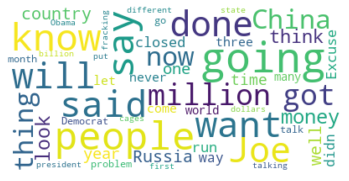

In [617]:
word_cld(Trump_transcript)

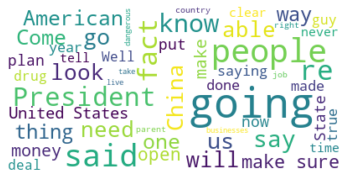

In [618]:
word_cld(Biden_transcript)

In [619]:
repub = np.array(Image.open('/Users/markroberts/Desktop/Effervescent_Ideas/DebateTranscript/pics/repub6.png').convert('L')   )

In [620]:
repub.shape

(872, 1158)

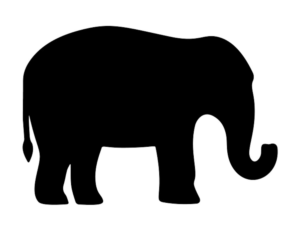

In [621]:
plt.imshow(repub, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [622]:
#repub.transpose(2,0,1).reshape(3,-1)

In [623]:
#repub

In [624]:
#np.bincount(repub)


In [625]:
#repub = repub[:, :, 0]


In [626]:
#plt.imshow(transformed_repub, cmap=plt.cm.gray, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [627]:
repub.shape

(872, 1158)

In [628]:
repub

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [629]:
def transform_format(val):
    if val == 40:
        return 255
    else:
        return val

In [630]:
transformed_repub = np.ndarray((repub.shape[0],repub.shape[1]), np.int32)

for i in range(len(repub)):
    transformed_repub[i] = list(map(transform_format, repub[i]))

In [631]:
transformed_repub

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

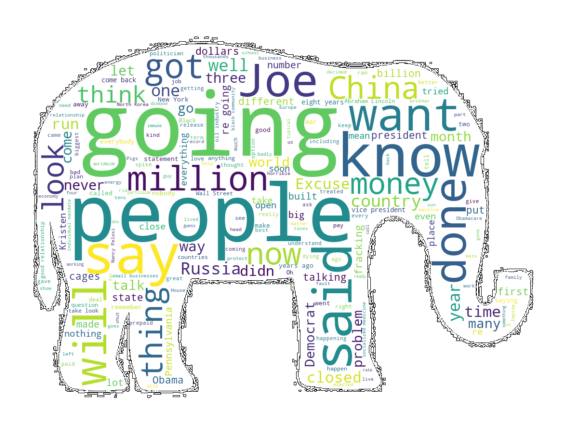

In [632]:
# Create a word cloud image
stopwrds = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=200, width=872, 
                      height=1158, mask=repub,
               stopwords=stopwrds, contour_width=.1, contour_color='black')

# Generate a wordcloud
wc.generate(str(Trump_transcript))

# show
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [633]:
dem = np.array(Image.open('/Users/markroberts/Desktop/Effervescent_Ideas/DebateTranscript/pics/dem2.png').convert('L')   )

In [634]:
dem.shape

(227, 222)

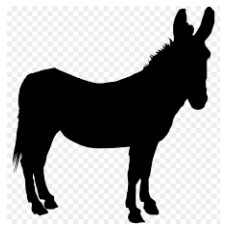

In [635]:
plt.imshow(dem, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [636]:
dem

array([[254, 254, 254, ..., 236, 237, 237],
       [254, 254, 254, ..., 236, 237, 237],
       [254, 254, 254, ..., 236, 237, 237],
       ...,
       [254, 254, 254, ..., 236, 237, 237],
       [254, 254, 254, ..., 236, 237, 237],
       [254, 254, 254, ..., 236, 237, 237]], dtype=uint8)

In [637]:
def transform_format(val):
    if val in [254,236,237,  11,  20,  30,  42,  49,  58,  68,  81,  90,  96, 110, 119,
       125, 132, 141, 151, 157, 166, 176, 186, 192, 207, 216, 222, 229,
       239, 244, 247, 250, 253]:
        return 255
    else:
        return val

In [638]:
transformed_dem = np.ndarray((dem.shape[0],dem.shape[1]), np.int32)

for i in range(len(dem)):
    transformed_dem[i] = list(map(transform_format, dem[i]))

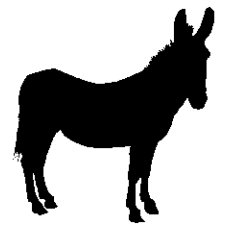

In [639]:
plt.imshow(transformed_dem, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [640]:
transformed_dem

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

In [641]:
#np.unique(transformed_dem)

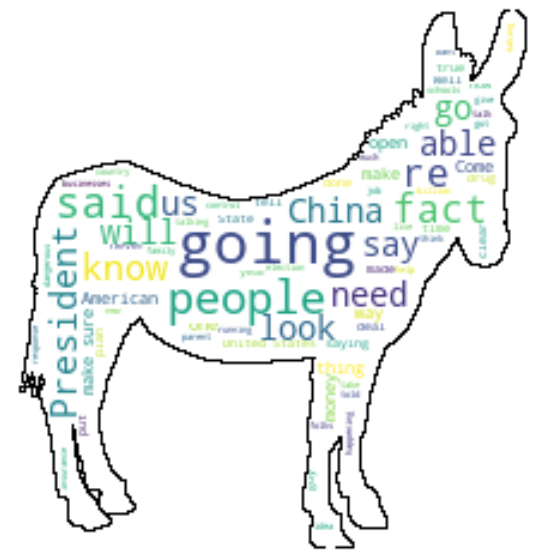

In [642]:
# Create a word cloud image
stopwrds = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=500, width=827, 
                      height=822, mask=transformed_dem,
               stopwords=stopwrds, contour_width=.1, contour_color='black')

# Generate a wordcloud
wc.generate(str(Biden_transcript))

# show
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

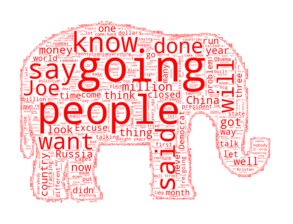

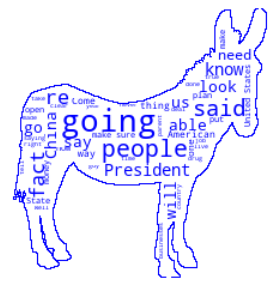

In [643]:
# Create word cloud image- Trumpy
stopwrds = set(STOPWORDS)
# font_path='arial', 
wc = WordCloud(background_color="white", max_words=500, width=872, 
                      height=1158, mask=repub,
               stopwords=stopwrds, contour_width=.1, contour_color='red', color_func=lambda *args, **kwargs: "red")

# Generate a wordcloud
wc.generate(str(Trump_transcript))

# show
plt.figure(figsize=[5,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


# Create a word cloud image- Biden
stopwrds = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=100000, width=827, 
                      height=1158, mask=transformed_dem,
               stopwords=stopwrds, contour_width=.1, contour_color='blue', color_func=lambda *args, **kwargs: "blue")

# Generate a wordcloud
wc.generate(str(Biden_transcript))

# show
plt.figure(figsize=[5,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


# Sentiment/Subjectivity Analysis

In [43]:
def senti(x):
    x = str(x)
    return TextBlob(x).sentiment[0]

def subjecti(x):
    x = str(x)
    return TextBlob(x).sentiment[1]


In [44]:
senti(Trump_transcript)

0.051258585858585844

In [45]:
subjecti(Trump_transcript)

0.4510865345181137

In [46]:
senti(Biden_transcript)

0.0969291964612299

In [47]:
subjecti(Biden_transcript)

0.43469024104957243

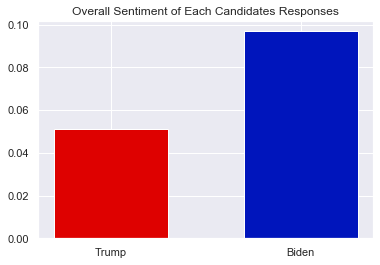

In [48]:
#sentiment bar chart
plt.bar(x= ["Trump", "Biden"], height = [senti(Trump_transcript), senti(Biden_transcript)], width= .6, color = ['#DE0100', '#0015BC'])
plt.title("Overall Sentiment of Each Candidates Responses")
plt.show()

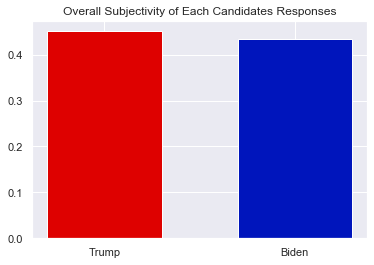

In [49]:
#subjectivity bar chart
plt.bar(x= ["Trump", "Biden"], height = [subjecti(Trump_transcript), subjecti(Biden_transcript)], width= .6, color = ['#DE0100', '#0015BC'])
plt.title("Overall Subjectivity of Each Candidates Responses")
plt.show()

In [50]:
# sentiment analysis over time!
def senti_each(transcript, col):
    sentis = [TextBlob(str(nlp(i))).sentiment[0] for i in transcript]
    sns.lineplot(x=range(len(sentis)), y = sentis, color = col)
    

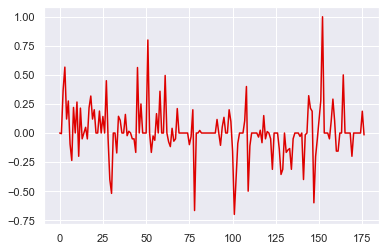

In [51]:
senti_each(Trump_transcript,'#DE0100')

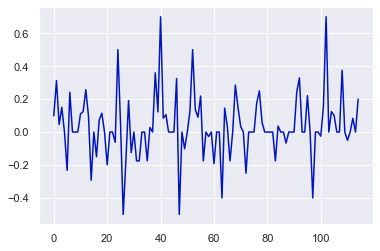

In [52]:
senti_each(Biden_transcript, '#0015BC')

### What were each candidate's most positive, most negative responses?

In [253]:
# sentiment analysis over time!
def senti_top_bottom(transcript):
    sentis = [TextBlob(str(nlp(i))).sentiment[0] for i in transcript]
    #sns.lineplot(x=range(len(sentis)), y = sentis)
    
    minpos = sentis.index(min(sentis))
    print("Lowest Sentiment:")
    print(transcript[minpos])
    
    maxpos = sentis.index(max(sentis))
    print("Highest Sentiment:")
    print(transcript[maxpos])
    

In [254]:
senti_top_bottom(Trump_transcript)

Lowest Sentiment:
(32:57)  Children are brought here by coyotes and lots of bad people, cartels...    
Highest Sentiment:
(19:42)  It's all a pipe dream, but you know what we'll do? We're going to have the greatest economy in the world, but if you want to kill the economy, get rid of your oil industry you want. And what about fracking?    


In [255]:
senti_top_bottom(Biden_transcript)

Lowest Sentiment:
(08:01)  No basis for that. Everybody investigated that. No one said anything he did was wrong in Ukraine.    
Highest Sentiment:
(16:15)  We had a good relationship with Hitler before he, in fact, invaded Europe, the rest of Europe. Come on. The reason he would not meet with President Obama is because President Obama said, \"We're going to talk about denuclearization. We're not going to legitimize you and we're going to continue to push stronger and stronger sanctions on you.\" That's why he wouldn't meet with us.    


# Unique Words

In [54]:
def nunique(lsst):
    doc = nlp(str([i for i in lsst]))
    tokens = [token.text for token in doc if not token.is_punct 
          and not token.is_stop 
          and not token.text == ' '
          and not token.text == '   ']
    token_set = set(tokens)
    return len(token_set)

In [55]:
nunique(Trump_transcript)

1142

In [56]:
nunique(Biden_transcript)

1156

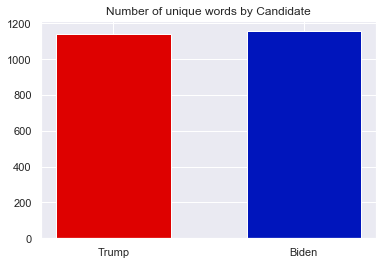

In [57]:
plt.bar(x= ["Trump", "Biden"], height = [nunique(Trump_transcript),nunique(Biden_transcript)], width= .6, animated = True, color = ['#DE0100', '#0015BC'])
plt.title("Number of unique words by Candidate")
plt.show()

# Total Words


In [59]:
trump_flat = [item for sublist in Trump_transcript for item in sublist]
biden_flat = [item for sublist in Biden_transcript for item in sublist]


In [60]:
len(trump_flat)

35817

In [61]:
len(biden_flat)

30884

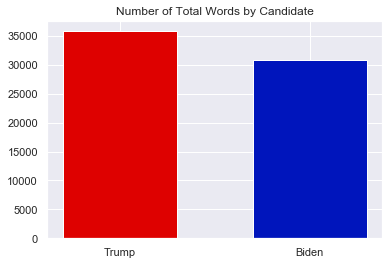

In [63]:
plt.bar(x= ["Trump", "Biden"], height = [len(trump_flat),len(biden_flat)], width= .6, animated = True, color = ['#DE0100', '#0015BC'])
plt.title("Number of Total Words by Candidate")
plt.show()

# Classifier Model

Moving all observations to a count vectorizer dataframe. Building models to predict who said what!

In [107]:
#dropping all numbers at begining
Trump_trans = [text[7:] for text in Trump_transcript]
Biden_trans = [text[7:] for text in Biden_transcript]

In [108]:
transcripts = []
transcripts.append([i for i in Trump_trans])


In [115]:
#flattening
transcript = [item for sublist in transcripts for item in sublist]

In [117]:
len(transcript)

292

In [118]:
len(Trump_trans)

177

In [119]:
len(Biden_trans)

115

In [120]:
len(Trump_trans) +len(Biden_trans)

292

In [121]:
#create count vector matrix
countvectorizer = CountVectorizer() # max_df=0.5 ?
countvectorizer_matrix = countvectorizer.fit_transform([str(i) for i in transcript])
countvectorizer_matrix.shape

(292, 1637)

In [122]:
#converting to pandas dataframe
countvectorizer_matrix_df = pd.DataFrame(countvectorizer_matrix.toarray(), columns=countvectorizer.get_feature_names())
countvectorizer_matrix_df

,000,10,100,11,130,145,15,18,183,1994,...,years,yes,yet,york,you,young,your,zero,zone,zones
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
[i for i in countvectorizer_matrix_df.columns][:20]

['000',
 '10',
 '100',
 '11',
 '130',
 '145',
 '15',
 '18',
 '183',
 '1994',
 '20',
 '200',
 '2000',
 '2013',
 '2014',
 '2015',
 '2023',
 '2025',
 '2035',
 '2050']

In [125]:
#dropping number columns
cv_df = countvectorizer_matrix_df.drop(['000',
 '10',
 '100',
 '11',
 '130',
 '145',
 '15',
 '18',
 '183',
 '1994',
 '20',
 '200',
 '2000',
 '2013',
 '2014',
 '2015',
 '2023',
 '2025',
 '2035',
 '2050',
 '220',
 '25',
 '28',
 '32',
 '35',
 '38',
 '3rd',
 '40',
 '401',
 '420',
 '43',
 '44',
 '47',
 '48',
 '50',
 '500',
 '51',
 '525',
 '70',
 '700',
 '750',
 '800',
 '80s',
 '85',
 '90',
 '99'], axis = 1)

In [127]:
cv_df.head()

,abide,ability,able,about,above,abraham,absolutely,abuse,access,accord,...,years,yes,yet,york,you,young,your,zero,zone,zones
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
#creating Y: list of Trumps and Bidens
y= []
t = list(np.repeat("Trump",len(Trump_trans)))
b = list(np.repeat("Biden",len(Biden_trans)))
y.append(t)
y.append(b)

y = [item for sublist in y for item in sublist]

In [139]:
# define X and y
X = cv_df
y = [i for i in y]
print(f"X Shape: {X.shape}")
print(f"y Shape: {len(y)}")

X Shape: (292, 1591)
y Shape: 292


In [144]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(f"Training records, X_train: {X_train.shape} y_train: {len(y_train)}")
print(f"Testing records, X_test: {X_test.shape} y_test: {len(y_test)}")

Training records, X_train: (219, 1591) y_train: 219
Testing records, X_test: (73, 1591) y_test: 73


### Naive Bayes

In [145]:
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

CPU times: user 7.13 ms, sys: 1.43 ms, total: 8.56 ms
Wall time: 6.97 ms
Test Accuracy: 78.1%
              precision    recall  f1-score   support

       Biden       0.83      0.61      0.70        31
       Trump       0.76      0.90      0.83        42

    accuracy                           0.78        73
   macro avg       0.79      0.76      0.76        73
weighted avg       0.79      0.78      0.77        73



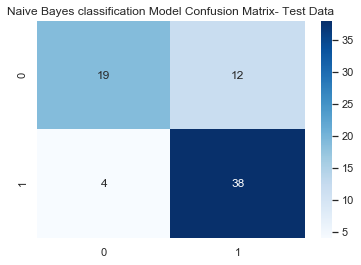

In [146]:
# train and time the model using X_train_dtm
%time nb.fit(X_train, y_train)

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test)

# calculate accuracy of class predictions
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_class) * 100:.1f}%")

nb_acc = metrics.accuracy_score(y_test, y_pred_class) * 100

# calculate precision and recall
print(classification_report(y_test, y_pred_class))

# creating test data Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)

#plotting heatmap confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues',fmt="d").set_title(
    'Naive Bayes classification Model Confusion Matrix- Test Data')
plt.show()


### Logistic Regression

In [147]:
# instantiate a logistic regression model
logreg = LogisticRegression(max_iter=1000)

CPU times: user 87.5 ms, sys: 14.3 ms, total: 102 ms
Wall time: 20.9 ms
Test Accuracy: 79.5%
              precision    recall  f1-score   support

       Biden       0.81      0.68      0.74        31
       Trump       0.79      0.88      0.83        42

    accuracy                           0.79        73
   macro avg       0.80      0.78      0.78        73
weighted avg       0.80      0.79      0.79        73



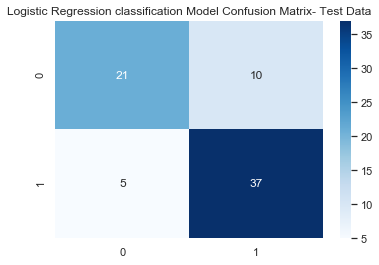

In [161]:
# train the model using X_train_dtm
%time logreg.fit(X_train, y_train)

# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test)

# calculate accuracy of class predictions
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_class) * 100:.1f}%")

logreg_acc = metrics.accuracy_score(y_test, y_pred_class) * 100

# calculate precision and recall
print(classification_report(y_test, y_pred_class))

# creating test data Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)

#plotting heatmap confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues',fmt="d").set_title(
    'Logistic Regression classification Model Confusion Matrix- Test Data')
plt.show()


### Support Vector Machine

In [162]:
# instantiate a SVM model
svm = SGDClassifier(max_iter=1000, tol=None)

CPU times: user 399 ms, sys: 2.11 ms, total: 401 ms
Wall time: 400 ms
Test Accuracy: 78.1%
              precision    recall  f1-score   support

       Biden       0.68      0.90      0.78        31
       Trump       0.91      0.69      0.78        42

    accuracy                           0.78        73
   macro avg       0.79      0.80      0.78        73
weighted avg       0.81      0.78      0.78        73



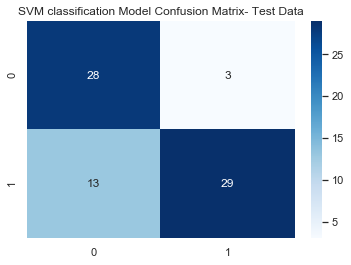

In [166]:
# train the model using X_train_dtm
%time svm.fit(X_train, y_train)

# make class predictions for X_test_dtm
y_pred_class = svm.predict(X_test)

# calculate accuracy of class predictions
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_class) * 100:.1f}%")

svm_acc = metrics.accuracy_score(y_test, y_pred_class) * 100

# calculate precision and recall
print(classification_report(y_test, y_pred_class))

# creating test data Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)

#plotting heatmap confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues',fmt="d").set_title(
    'SVM classification Model Confusion Matrix- Test Data')
plt.show()


### Random Forest

In [167]:
# instantiate a RF model
RF =RandomForestClassifier(random_state = 1)

CPU times: user 184 ms, sys: 2.11 ms, total: 186 ms
Wall time: 185 ms
Test Accuracy: 76.7%
              precision    recall  f1-score   support

       Biden       0.79      0.61      0.69        31
       Trump       0.76      0.88      0.81        42

    accuracy                           0.77        73
   macro avg       0.77      0.75      0.75        73
weighted avg       0.77      0.77      0.76        73



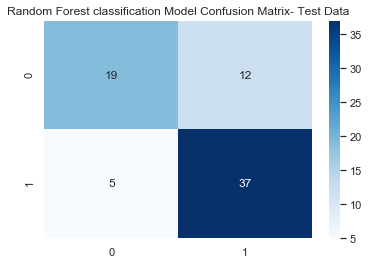

In [168]:
# train the model using X_train_dtm
%time RF.fit(X_train, y_train)

# make class predictions for X_test_dtm
y_pred_class = RF.predict(X_test)

# calculate accuracy of class predictions
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_class) * 100:.1f}%")

RF_acc = metrics.accuracy_score(y_test, y_pred_class) * 100

# calculate precision and recall
print(classification_report(y_test, y_pred_class))

# creating test data Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)

#plotting heatmap confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues',fmt="d").set_title(
    'Random Forest classification Model Confusion Matrix- Test Data')
plt.show()


In [182]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [183]:
#creating GridSearch object
RF_Grid = GridSearchCV(RF, random_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

In [ ]:
#Fitting gridsearch on data
res = RF_Grid.fit(X_train,y_train)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed: 12.0min


In [ ]:
#fitting new model to the best estimator with best parameters
RF_best = res.best_estimator_
RF_best

In [ ]:
#making test predictions
GS_test_pred = RF_best.predict(X_test)
GS_test_pred[:10]

In [ ]:
# creating test data Confusion Matrix
cm = confusion_matrix(y_test, GS_test_pred)

#plotting heatmap confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues',fmt="d").set_title(
    'ADABoost Classifier Grid Search Confusion Matrix- Test Data')
plt.show()


In [ ]:
#Plotting ADAboost AUC 
plot_roc_curve(RF_best, X_test, y_test)
plt.title("RF Classifier Grid Search Model ROC Curve Plot")
plt.show()

In [ ]:
print(f"Test Accuracy: {metrics.accuracy_score(y_test, GS_test_pred) * 100:.1f}%")